In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [4]:
img = cv2.imread('image.jpg')
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

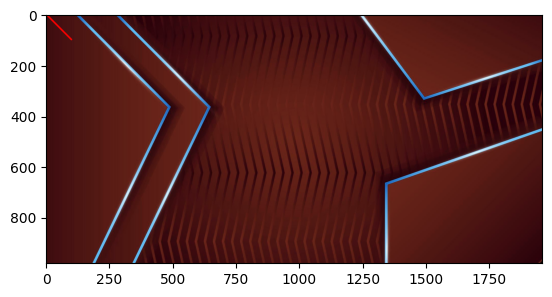

In [5]:
img = cv2.imread('image.jpg')
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
plt.imshow(img)

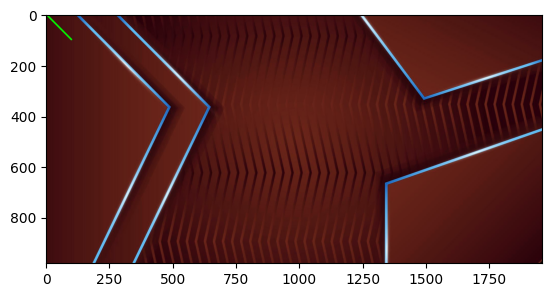

In [6]:
img = cv2.imread('image.jpg')
cv2.line(img, (0, 0), (100, 100), (0, 255, 0), 5)
plt.imshow(img)

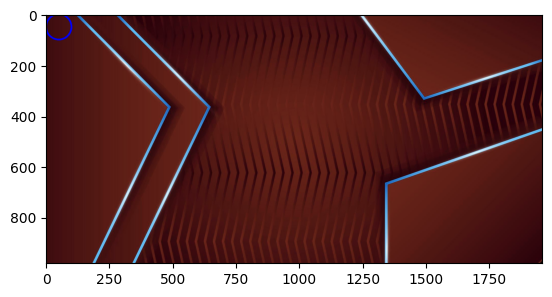

In [7]:
img = cv2.imread('image.jpg')
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
plt.imshow(img)

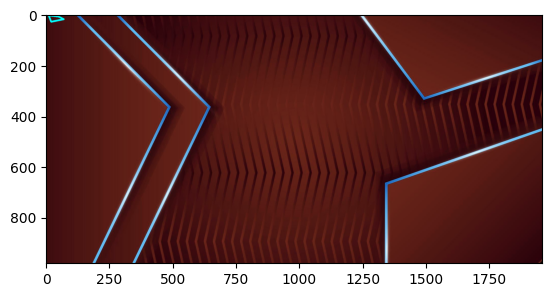

In [8]:
img = cv2.imread('image.jpg')

pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
plt.imshow(img)

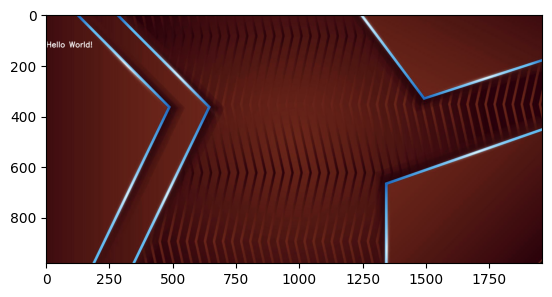

In [9]:
img = cv2.imread('image.jpg')

cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)

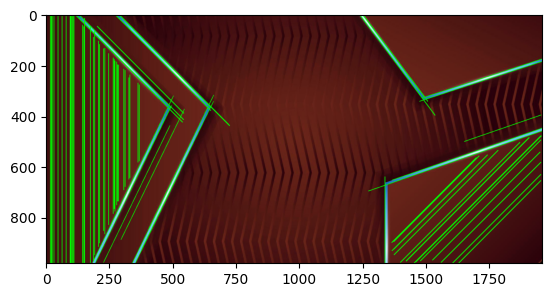

In [10]:
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 0, 255, apertureSize=7) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=300
                ,
                maxLineGap=10,
        ) # detect lines

if lines.all() == True:
    pass
else:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.imshow(img)



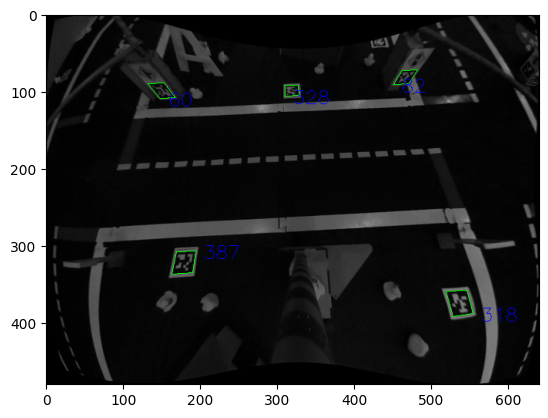

In [ ]:

img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    



In [ ]:
# test.ipynb

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import the revised functions
from lane_detection import detect_lines, detect_lanes, draw_lanes
from lane_following import get_lane_center, recommend_direction

def test_lane_detection_pipeline(image_path):
    """
    A streamlined function to test the full lane detection and following pipeline.
    """
    # 1. Load Image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return
        
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape

    # 2. Detect initial line segments
    # Uses the new, more selective defaults in detect_lines()
    lines = detect_lines(img)

    # 3. Average line segments into final lanes
    lanes = detect_lanes(img, lines)
    
    # 4. Get navigation recommendation
    center_intercept, _ = get_lane_center(lanes, height, width)
    recommendation = recommend_direction(center_intercept, width)
    
    # 5. Visualize the results
    img_with_lanes = draw_lanes(img_rgb, lanes)
    

    if lanes is None or len(lanes) == 0:
        print("No lanes detected.")
        return
    print(f"Detected {len(lanes)} stable lane(s).")

    print(f"Recommendation: {recommendation}")

    plt.figure(figsize=(12, 7))
    plt.imshow(img_with_lanes)
    
    # Add visualization for the lane center and image center
    if center_intercept is not None:
        plt.axvline(x=center_intercept, color='yellow', linestyle='--', linewidth=3, label='Lane Center')
        plt.axvline(x=width/2, color='white', linestyle=':', linewidth=2, label='Image Center')
    
    plt.title(f'Lane Detection Result\nRecommendation: {recommendation}', fontsize=16)
    plt.xlabel(f"Image Width: {width}px | Center: {width/2}px")
    plt.legend()
    plt.show()


# --- Main Execution ---
if __name__ == "__main__":
    image_file = 'image_211f18.jpg'
    test_lane_detection_pipeline(image_file)

TypeError: object of type 'NoneType' has no len()